In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn
import plotly.subplots as sub
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AMAZON/Test.csv")
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AMAZON/Train.csv")
sample = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AMAZON/sample submission.csv")

In [ ]:
test.shape, train.shape, sample.shape

((8745, 20), (13645, 22), (7, 3))

In [ ]:
train.groupby(
    ["LanguageOfCommunication"]           
).count()["EmpID"].reset_index()

,LanguageOfCommunication,EmpID
0,English,7510
1,Hindi,4733
2,Native,1402


In [ ]:
train.groupby(
    ["DepartmentInCompany"]
).count()["EmpID"].reset_index()    

,DepartmentInCompany,EmpID
0,Customer Success,1570
1,Design,4393
2,Engineering,5749
3,Finance,701
4,Product,1232


In [ ]:
fig = px.histogram(train, x="HighestDegree")
fig.show()

It is clearly visible that Btech is very popular among the candidates.

In [ ]:
fig = px.histogram(train, x="BiasInfluentialFactor")
fig.show()

Indication : 

* Year of Experience : It's because sometimes there are some minimum requirement of the expeerience in a particular job.
*   Latest Degree CGPA : It's not work as a driver in the ride of getting a job.
*   Degree Branch : As expected because some job profiles requires some kind of experties and some degree programs provides that facility to learn those.
* Gender : It's very pity to see this that there is a gender biasness which is involved in this procedure.
* Current Company type : As a general tendency most candidates join startups in the early stages and then move on to the enterprises.



In [ ]:
train.groupby(
    ["CurrentDesignation"]
).agg({
    "FitmentPercent": ['mean', 'max', 'min']
}).reset_index()   

CurrentDesignation FitmentPercent              
                               mean    max    min
0                 BA      75.565006  95.50  33.88
1                 DA      76.891951  95.50  33.53
2                 DE      74.063778  95.09  34.42
3                 DS      76.159615  95.49  33.53
4                 EM      75.790596  95.50  33.60
5                SDE      75.856120  95.50  33.58
6                SEM      76.751882  95.49  33.71
7                SSE      75.885137  95.49  33.62

In [ ]:
train_less = train[train["FitmentPercent"]<75]

In [ ]:
train_less.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,6,2015,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
6,16554,Joseph,Hindi,31,Male,JR85289,PhD,Computer Science,Tier 1,7,1,2020,12,21,Single,3,SDE,Enterprise,Customer Success,8,CurrentCompanyType,62.29
9,10157,Robert,Native,31,Female,JR88873,B.Tech,Artificial Intelligence,Tier 2,8,8,2013,21,31,Married,3,SDE,Startup,Customer Success,10,Gender,73.31
10,24117,Edward,Hindi,29,Male,JR85289,B.Tech,Artificial Intelligence,Tier 1,7,6,2015,9,16,Married,3,EM,Enterprise,Finance,6,NaN,56.85


In [ ]:
fig = px.histogram(train_less, x="BiasInfluentialFactor")
fig.show()

In [ ]:
print(train_less.groupby(
    ["CurrentCompanyType"]
).count()["EmpID"].reset_index())

print(train_less.groupby(
    ["DegreeBranch"]
).count()["EmpID"].reset_index())

  CurrentCompanyType  EmpID
0         Enterprise   2897
1           MidSized    902
2            Startup   1984
                 DegreeBranch  EmpID
0     Artificial Intelligence    853
1            Computer Science   1992
2                  Electrical    769
3  Electrical and Electronics    162
4                 Electronics    730
5      Information Technology   1277


It looks like midsized and startup have high learning orpportunity instead of enterprise because there are high number of <75% fitment score candidtes from enterprises. 

Degree is also one of the major factor because companies have some requirements which should acheived by your degrees.

# Feature Engineering

In [ ]:
# @title Increment percentage expected

train["IncrementPercentage"] = (train["ExpectedCTC"] - train["CurrentCTC"])/ train["CurrentCTC"]*100
test["IncrementPercentage"] = (test["ExpectedCTC"] - test["CurrentCTC"])/ test["CurrentCTC"]*100

We are assumming the ranking of the companies are :
* Enterprise
* MidSized
* Startup

As Amazon is the enterprise so if someone comming from startup they should have 2 point and if someone is from enterprise then they will have 0.

In [ ]:
# @title Increment Score

mapper = {
    "Enterprise" : 0,
    "MidSized" : 1,
    "Startup" : 2
}

train["IncrementScore"] = list(map(lambda x: mapper[x], train["CurrentCompanyType"]))
test["IncrementScore"] = list(map(lambda x: mapper[x], test["CurrentCompanyType"]))

# Converting data into numerical values

In [ ]:
Fitment = train["FitmentPercent"]
ids = test["EmpID"]
train = train.drop(["EmpID", "EmpName", "JobProfileIDApplyingFor", "FitmentPercent"] , axis=1) 
test =  test.drop(["EmpID", "EmpName", "JobProfileIDApplyingFor"] , axis=1)

In [ ]:
train.head()

,LanguageOfCommunication,Age,Gender,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,IncrementPercentage,IncrementScore
0,English,35,Male,B.Tech,Electrical,Tier 1,7,12,2009,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,23.809524,0
1,English,26,Male,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6,NaN,26.666667,1
2,English,36,Female,PhD,Computer Science,Tier 1,6,6,2015,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,60.000000,1
3,English,29,Female,BCA,Information Technology,Tier 2,5,6,2015,16,24,Married,5,SDE,Startup,Product,16,Gender,50.000000,2
4,English,25,Male,Dual M.Tech,Computer Science,Tier 3,8,2,2019,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,33.333333,0


In [ ]:
test.head()

,LanguageOfCommunication,Age,Gender,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,IncrementPercentage,IncrementScore
0,Native,35,Male,PhD,Information Technology,Tier 2,5,5,2016,27,34,Single,4,SDE,Enterprise,Finance,18,25.925926,0
1,English,35,Male,B.Tech,Information Technology,Tier 3,9,12,2009,29,33,Married,4,EM,Enterprise,Engineering,8,13.793103,0
2,English,28,Male,M.Tech,Artificial Intelligence,Tier 2,9,2,2019,18,25,Married,3,SDE,Startup,Engineering,18,38.888889,2
3,Hindi,37,Male,MS,Computer Science,Tier 2,8,11,2010,7,12,Single,5,DS,Enterprise,Product,17,71.428571,0
4,Hindi,36,Female,PhD,Artificial Intelligence,Tier 2,7,6,2015,22,32,Married,4,SDE,Startup,Engineering,9,45.454545,2


In [ ]:
# @title Encoding

from sklearn.preprocessing import LabelEncoder

def encoding(train) : 
  le = LabelEncoder()
  
  train['Gender']= le.fit_transform(train['Gender'])
  train['LanguageOfCommunication']= le.fit_transform(train['LanguageOfCommunication'])
  train['HighestDegree']= le.fit_transform(train['HighestDegree'])
  train['DegreeBranch']= le.fit_transform(train['DegreeBranch'])
  train['GraduatingInstitute']= le.fit_transform(train['GraduatingInstitute'])
  train['MartialStatus']= le.fit_transform(train['MartialStatus'])
  train['CurrentDesignation']= le.fit_transform(train['CurrentDesignation'])
  train['CurrentCompanyType']= le.fit_transform(train['CurrentCompanyType'])
  train['DepartmentInCompany']= le.fit_transform(train['DepartmentInCompany'])
  train['GraduationYear']= le.fit_transform(train['GraduationYear'])
  
  train["Age"] = np.log(train["Age"])
  train["CurrentCTC"] = np.log(train["CurrentCTC"]) + 1
  train["ExpectedCTC"] = np.log(train["ExpectedCTC"]) + 1
  return train

train = encoding(train)
test = encoding(test)

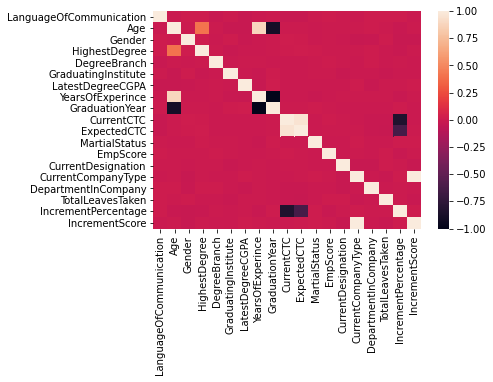

In [ ]:
sbn.heatmap(train.corr())

In [ ]:
train.head()

,LanguageOfCommunication,Age,Gender,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,IncrementPercentage,IncrementScore
0,0,3.555348,1,0,2,0,7,12,0,4.044522,4.258097,0,5,7,0,1,20,YearsOfExperince,23.809524,0
1,0,3.258097,1,0,0,2,7,3,9,3.708050,3.944439,0,5,0,1,2,6,NaN,26.666667,1
2,0,3.583519,0,7,1,0,6,6,6,3.708050,4.178054,1,5,5,1,2,19,Gender,60.000000,1
3,0,3.367296,0,1,5,1,5,6,6,3.772589,4.178054,0,5,5,2,4,16,Gender,50.000000,2
4,0,3.218876,1,2,1,2,8,2,10,4.178054,4.465736,0,5,5,0,2,10,DegreeBranch,33.333333,0


In [ ]:
train = train.fillna("NONE")

y = train["BiasInfluentialFactor"]

train = train.drop("BiasInfluentialFactor", axis=1)

Xtest = train[y == "NONE"]
Xtrain = train[y != "NONE"]
ytrain = y[y!="NONE"]

ley = LabelEncoder()
ytrain = ley.fit_transform(ytrain)

In [ ]:
Xtest.shape, Xtrain.shape, ytrain.shape

((3336, 19), (10309, 19), (10309,))

In [ ]:
!pip3 install catboost

In [ ]:
# @title LGBM Classifier

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score

def cross_val(X, y, model, params, folds=9):

    skf = StratifiedKFold(n_splits=folds, shuffle=True)
    f1 = []
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X[train_idx], y[train_idx]
        x_test, y_test = X[test_idx], y[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=200,
                verbose=400)

        pred = alg.predict(x_test)
        f1.append(f1_score(y_test, pred, average='micro'))
        print("f1 : ", f1[-1])
        print("-"*50)
    print("F1 score : ", sum(f1)/folds)
    return alg


lgb_params= {'learning_rate': 0.45, 
             'n_estimators': 2000, 
             'max_bin': 40,
             'num_leaves': 10,  
             'reg_lambda': 0.532, 
             'subsample': 0.749}
from lightgbm import LGBMClassifier
lgb_model = cross_val(np.array(Xtrain), np.array(ytrain), LGBMClassifier, lgb_params,5)

# cat_params= {'n_estimators': 20000, 
#                   'depth': 4, 
#                   'learning_rate': 0.023, 
#                   'colsample_bylevel': 0.655, 
#                   'bagging_temperature': 0.921, 
#                   'l2_leaf_reg': 10.133}
# from catboost import CatBoostClassifier
# cat_model = cross_val(X, y, CatBoostClassifier, cat_params, folds=5)

Fold: 0
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[22]	valid_0's multi_logloss: 0.244401
f1 :  0.9015518913676043
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[20]	valid_0's multi_logloss: 0.252122
f1 :  0.9000969932104752
--------------------------------------------------
Fold: 2
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[22]	valid_0's multi_logloss: 0.250702
f1 :  0.9044616876818623
--------------------------------------------------
Fold: 3
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[19]	valid_0's multi_logloss: 0.236111
f1 :  0.906886517943744
--------------------------------------------------
Fold: 4
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[24]	valid_

In [ ]:
Xtest["BiasInfluentialFactor"] = lgb_model.predict(Xtest)
Xtrain["BiasInfluentialFactor"] = ytrain
test["BiasInfluentialFactor"] = lgb_model.predict(test)

bias = test["BiasInfluentialFactor"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train = pd.concat([Xtest, Xtrain])

In [ ]:
train.head()

,LanguageOfCommunication,Age,Gender,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,IncrementPercentage,IncrementScore,BiasInfluentialFactor
1,0,3.258097,1,0,0,2,7,3,9,3.708050,3.944439,0,5,0,1,2,6,26.666667,1,2
10,1,3.367296,1,0,0,0,7,6,6,3.197225,3.772589,0,3,4,0,3,6,77.777778,0,0
13,1,3.295837,1,0,1,0,5,4,8,3.833213,4.258097,0,2,4,0,2,20,52.941176,0,0
17,0,3.526361,1,4,2,1,7,8,4,3.484907,3.890372,0,5,7,0,1,16,50.000000,0,0
22,2,3.526361,1,0,4,0,7,11,1,3.197225,3.708050,0,3,7,0,3,18,66.666667,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.metrics import mean_absolute_error as mae

In [ ]:
X = train
y = Fitment


transformer = StandardScaler().fit(X)
X = transformer.transform(X)
test = transformer.transform(test)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.75)

degree=1
Input=[('polynomial',PolynomialFeatures(degree)),('modal',ElasticNet(alpha=0.45))]
pipe=Pipeline(Input)
pipe.fit(xtrain,ytrain)

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('modal',
                 ElasticNet(alpha=0.45, copy_X=True, fit_intercept=True,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [ ]:
poly_pred=pipe.predict(xtest)
mae(poly_pred, ytest)

11.81378457365447

In [ ]:
prediction = pipe.predict(test)

In [ ]:
pd.DataFrame({"EmpID" : ids, "BiasInfluentialFactor":ley.inverse_transform(bias), "FitmentPercent":prediction}).to_csv("/content/drive/MyDrive/Colab Notebooks/AMAZON/sol.csv", index=False)